In [1]:
suppressPackageStartupMessages({
    library(Matrix)
    library(ggplot2)
    library(cygnus)
    library(dplyr)
    library(data.table)
    library(purrr)
    library(ggthemes)
    library(viridis)
    library(patchwork)
    library(glue)
    library(sf)
    library(ComplexHeatmap)
    library(RSpectra)
    library(mclust)
    library(Seurat)
    })

fig.size <- function(h, w) {
    options(repr.plot.height = h, repr.plot.width = w)
}


In [2]:
cells = readMM('data/VizgenLungHacohen/cells/counts.mtx')
genes = read.table('data/VizgenLungHacohen/cells/genes.txt', header=TRUE)
meta_data = read.table('data/VizgenLungHacohen/cells/meta_data.csv', sep=',', header=TRUE)

In [3]:
meta_data

cell    library    X         Y             ntx ngene nblank type_lvl1 
1        1      Patient001 7086.414   79.414863586 30  23    0      Epithelial
2        2      Patient001 7090.282  -74.397941589 16  14    0      Lymphocyte
3        3      Patient001 7087.515  -21.805605888 15  12    1      Epithelial
4        4      Patient001 7099.331  -17.703966141 29  20    0      Epithelial
5        5      Patient001 7100.477   -9.060024023 29  16    1      Epithelial
6        6      Patient001 7093.215   -5.783357859 31  22    0      Epithelial
7        7      Patient001 7086.925   -4.925822675 24  18    0      Epithelial
8        8      Patient001 7093.836    4.836622715 21  16    0      Epithelial
9        9      Patient001 7091.700   13.036805630 49  32    1      Epithelial
10      10      Patient001 7099.888   27.607007980 74  36    1      Epithelial
11      11      Patient001 7099.327   37.417846680 40  26    1      Epithelial
12      12      Patient001 7089.702   38.761659622 35  23    1      Epithelial
13      13      Patient001 7096.220   87.116035461 36  26    0      Epithelial
14      14      Patient001 7087.769   89.227882385 41  30    0      Epithelial
15      15      Patient001 7087.888    1.637050629 21  16    0      Epithelial
16      16      Patient001 7099.507   68.977649689 59  41    0      Myeloid   
17      17      Patient001 7104.544  -24.178731918 17  16    0      Epithelial
18      18      Patient001 7103.027    0.034350634 24  21    1      Epithelial
19      19      Patient001 7088.350   24.300184250 20  18    2      Myeloid   
20      20      Patient001 7098.650    8.274554491 23  16    0      Epithelial
21      21      Patient001 7097.191   48.696235657 38  26    0      Epithelial
22      22      Patient001 7102.805   14.968989849 21  17    0      Epithelial
23      23      Patient001 7098.257  -36.137849808 39  26    1      Epithelial
24      24      Patient001 7090.522  -35.729204178 20  19    1      Epithelial
25      25      Patient001 7093.620   74.964038849 24  19    0      Epithelial
26      26      Patient001 7089.738   61.872133255 21  18    1      Epithelial
27      27      Patient001 7097.536    0.006357908 29  20    0      Epithelial
28      28      Patient001 7089.031  -29.746194839 16  13    0      Epithelial
29      29      Patient001 7087.657  -11.493567467 15  13    0      Epithelial
30      30      Patient001 7105.987   91.134555817 20  17    0      Epithelial
⋮       ⋮       ⋮          ⋮         ⋮             ⋮   ⋮     ⋮      ⋮         
1591312 2295154 Sample05    9834.732 3371.735      11  10    0                
1591313 2295155 Sample05    9983.941 3483.810      14   9    0      Epithelial
1591314 2295156 Sample05    9948.159 3808.028      10   9    0      Epithelial
1591315 2295164 Sample05   10065.694 3908.217      12  10    0      Fibroblast
1591316 2295165 Sample05   10203.217 3426.221      17  10    0      Myeloid   
1591317 2295166 Sample05   10138.926 3555.438      10   7    0                
1591318 2295167 Sample05   10049.135 3454.437      11   9    0      Epithelial
1591319 2295168 Sample05   10119.399 3390.118      12  10    0                
1591320 2295169 Sample05   10262.079 3003.871      10   9    1      Epithelial
1591321 2295170 Sample05   10397.388 3194.142      12  11    0      Epithelial
1591322 2295171 Sample05   10306.355 3167.409      10  10    0      Epithelial
1591323 2295172 Sample05   10366.479 3289.817      15  13    0      Epithelial
1591324 2295173 Sample05   10262.480 3708.805      12  10    0      Epithelial
1591325 2295174 Sample05   10289.088 3804.500      24  17    0      Fibroblast
1591326 2295176 Sample05   10485.269 3938.140      16  13    0      Epithelial
1591327 2295177 Sample05   10497.134 3833.220      10  10    0      Epithelial
1591328 2295178 Sample05   10553.165 3714.388      16  12    0      Lymphocyte
1591329 2295179 Sample05   10529.918 3805.016      13  12    0      Epithelial
1591330 2295180 Sample05   10568.430 3759.857      11  11 

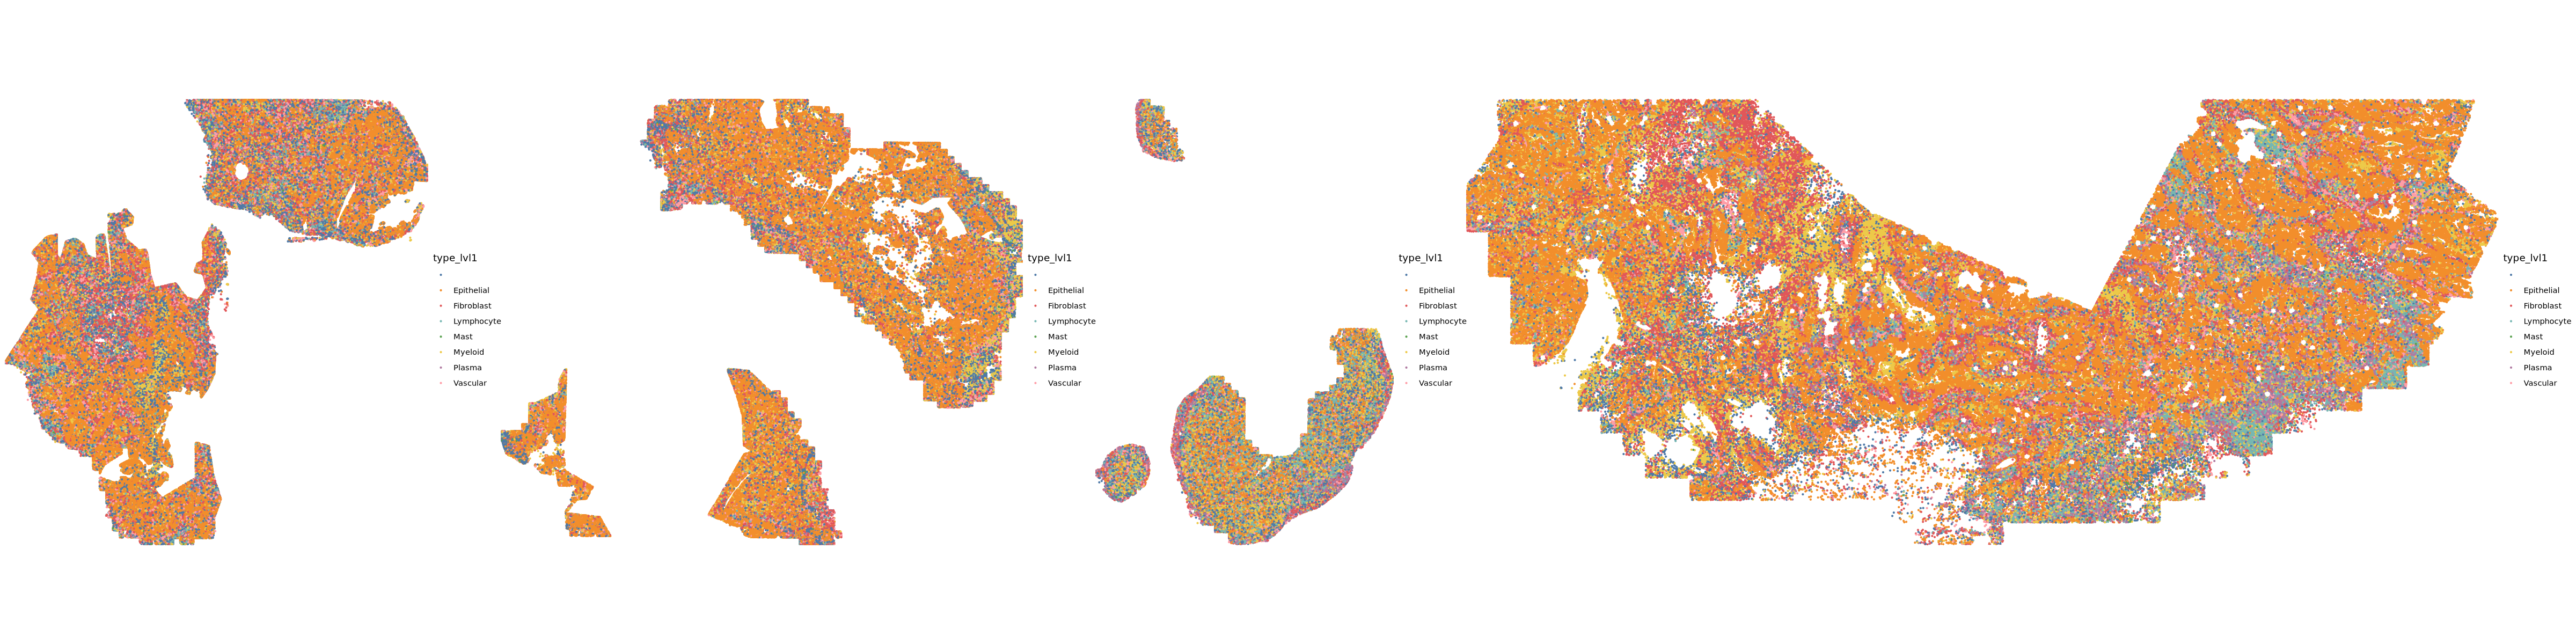

In [4]:
# Stratefied by patients


fig.size(10,40)
purrr::map(c('Patient001', 'Patient002', 'Sample04', 'Sample05'), function(i){
    ggplot() +
    geom_point(data = meta_data[meta_data$library==i,], aes(X, Y, color=type_lvl1), size=0.5) +
    theme_void() +
    scale_color_tableau() +
    coord_sf(expand = FALSE) +
    NULL
}) %>% purrr::reduce(`|`)

In [5]:
meta_patient1 = meta_data[meta_data$library=='Patient001',]
meta_patient2 = meta_data[meta_data$library=='Patient002',]
meta_sample4 = meta_data[meta_data$library=='Sample04',]
meta_sample5 = meta_data[meta_data$library=='Sample05',]

counts_patient1 = cells[,as.numeric(rownames(meta_patient1))]
counts_patient2 = cells[,as.numeric(rownames(meta_patient2))]
counts_sample4 = cells[,as.numeric(rownames(meta_sample4))]
counts_sample5 = cells[,as.numeric(rownames(meta_sample5))]

In [6]:
table(meta_patient1$type_lvl1)


           Epithelial Fibroblast Lymphocyte       Mast    Myeloid     Plasma 
     44416     302987      82154      59302       1884     114909      14832 
  Vascular 
     44124 

In [12]:
gettiles <- function(metadf, countsdf){
    res = GetTiles(
    metadf$X, metadf$Y, countsdf, metadf, c('type_lvl1', 'type_lvl2'),
    max_npts = 50,
    min_npts = 5,
    smooth_distance = 'projected', smooth_similarity = 'projected')
    dmt = res$dmt
    aggs = res$aggs
    return(c(dmt,aggs))
}


In [13]:
res_patient1 = gettiles(meta_patient1, counts_patient1)

STEP 0: PREPARE DATA STRUCTURES

STEP 2: DMT

